# COMP1008 2024/25 Coursework - Wine Quality Prediction with Machine Learning

#### **Student Name**: Gabriel Bridger
#### **Student ID**: 2086810 

## Task description

**Main Task**: Utilizing the provided Red Wine Quality dataset, build a Linear Regression Model and another Machine Learning Model of your choice to predict wine quality. Employ appropriate methods from the `pandas`, `matplotlib`, and `sklearn` libraries to analyze and process the dataset for building predictive models.



**Format**: Use this Jupyter Notebook as a template to write your report in `Markdown` cells, supported by your source code in Code cells. Ensure your code produces the corresponding plots or results addressing the questions. Rename this .ipynb file to `202425_COMP1008_cw_XXX.ipynb`, where XXX is your username (e.g., psxyz), and submit it to Moodle by <b><font color = "red">24 March, 3pm</font></b>.

**Marks**: The coursework is worth a total of 100 marks (accounting for 25% of the COMP1008 module grade). Marks will be awarded based on your understanding of machine learning theories, the informativeness and presentation of your code, visualizations, results (e.g., code comments, necessary labels in plots), self-learning ability in solving the specific problem, as well as, how succinct, concise, and clear is your report writing.

Please check the detailed instructions at the end of this template file.

<div class="alert alert-success" style="text-align:left;">
<h2>Question 1. Prediction Model 1 - Linear Regression Model<span style="float:right;">[50 marks]</span></h2></div>

#### Question 1a <span style="color:red">(5 marks)</span> 
**TASK**: Briefly explain why the Red Wine Quality dataset is suitable for linear regression analysis.
- Identify at least 3 characteristics that make this dataset appropriate for regression.
- Use 3 bullet points (one for each characteristics) to present your answer concisely.
- Your explanation should reflect your understanding of the linear regression model.

<b>Q1a Answer</b>: Your answer here

**Continuous Numerical Values**    
The data set has continuous numerical values which allows values to be plotted and analysed to create an equation for the line generated from linear regression techniques. This makes it appropriate because linear regression essentially constructs a line with a linear equation to try and plot a relationship between some given attributes, so the more points and the wider range of points that the algorithm is given the more accurately it will be able to generate a line representing the relationship between the given inputs and the selected output

**Clear Target Values**    
By having a clear target value - 'quality' attribute - it means that the system will be able to calculate a 'loss' value to see how good the generated equation is at predecting the relationship between the set of inputs and the output which means that the algorithm can look at the current loss and previous loss to see if it has decreased and if it has then the algorithm knows for the next iteration aswell to shift the regression line further in that direction so that it isn't blindly guessing which way will improve the accuracy of the predicted relationship.   

**Likely Linear Relation**
Lots of the potential input attributes within the dataset are likely to be linearly related meaning there likely exists a linear equation that can plot the overall relationship between the inputs of the wine data set and the outputs. So a linear regression model will be able to pretty accurately predict the relationship aswell as its aim is to try and establish the linear relationship between attributes

---

#### Question 1b <span style="color:red">(15 marks)</span>

**TASK**: Analyze the dataset using appropriate methods from the `pandas` and/or `matplotlib` libraries. 
- Identify potential issues with the current dataset, specify which part(s) of the dataset are affected. Explain what could go wrong if the data is not properly pre-processed.
- Provide at least 2 short-code solutions demonstrating how you analyze these issues.  
- Briefly explain how each code snippet helps evaluate data quality issues.


<b>Q1b answer</b>: Your answer here

### Potential Issues Within the Current Dataset
**NaN Values**

`Not A Number` values exist within the data set such as within the `density` or the `free sulfur dioxide` attribute.

If pre-processing isn't applied to remove the `NaN` values from the dataset then this could break the model because if an input is `Not a Number` then the formula (equation of the regression line) cannot be used to predicted the output value of an input which would cause the program to crash.1


**Outliers Within the Dataset**

Some values within the dataset have extreme values/outliers - such as in the `chlorides` or `sulphates` columns - which can make it harder for the algorithm to develop a linear regression line for the dataset, so these values will need to be identified and then removed from the data set to avoid harming the model.

If pre-processing isn't properly applied then the outliers can skew the predicted relationship between the inputs and the outputs resulting in inaccurate predictions for a given set of inputs.


**Not Normally Distributed**

Some of the data for attributes such as `residual sugar` have skewed data distributions and linear regression generally assumes that data is normally distributed across the dataset.

If pre-processing isn't properly applied then the model may be more sensitive to the outliers/extreme values present in some columns as it will try to create a linear relationship that can satisfy both extreme and normal values therefore the regression line will end up somewhere in between the extreme and normal values therefore it's predictions could be inaccurate.


**Duplicate Values**

If any duplicate rows exist within the dataframe this could become an issue when the algorithm begins to try and map the linear relationship between the inputs and the outputs. This is because by having duplicate rows the system may become bias towards the over duplicates as they appear more often so the algorithm then believes they should be more common, however in reality they may not be. Another issue that arises from having duplicate values is that the model can **overfit** to that specific data entry meaning that the performance metrics - such as `loss` - may be over inflated because for the test data the regression line would be very good at predicting a single combination of inputs' output values however on unseen data it may not perform as well due to over-representation of a single row within the dataset. 

In [2]:
import pandas as pd
wineQualDf = pd.read_csv('winequality-red.csv')

# run to set up the data frame to be pre-processed

**Counting NaN Values**

The `countNaNRows()` takes in the data frame to be analysed and then uses the `df.isna()` function to create a dataframe of booleans identifiying whether the value at the corresponding location is a `NaN` value or not. Then the `.any(axis=1)` function is applied which conceptually flattens a dataframe into a list by looking at a row - determined by axis = 0 for columns or axis = 1 for rows - of a given index within the dataframe and then if any of the values in that row are `True` then the corresponding index in the created list will be `True` aswell, otherwise the corresponding index is set to `False`. This then means that the `.sum()` function can be applied as it is now operating on a list/array which takes `True = 1` and `False = 0` so by totalling the list it gives us the number of rows that contain `NaN` values.

In [3]:
def countNaNRows(df):
    NaNCount = df.isna().any(axis=1).sum()
    return NaNCount


countNaNRows(wineQualDf)

np.int64(275)

**Counting Outliers**

When removing outliers, once abstracted, the larger problem isn't removing the values from the dataframe but identifying and establishing what constitutes an outlier.

In the code snippet above an outlier is identified as a value that is either:
- *greater than the third quartile of the dataset plus 3 × the interquartile range*
- *less than the first quartile of the dataset minus 3 × the interquartile range*

The function `countOutlierRows` counts the number of rows that would be removed due to containing values that would be classified as 'outliers' by the program, this is done by first getting the quantiles of the passed in dataframe and then calculates the interquartile range. Next it generates a boolean mask with values that meet either condition specified. It then calls the `.sum()` function to finally count the number of rows that would be removed from the data frame due to containing values that constitute outliers.

In [4]:
def countOutlierRows(df) -> pd.DataFrame:
    quart1 = df.quantile(0.25)
    quart3 = df.quantile(0.75)

    IQrange = quart3 - quart1

    lowerBound = quart1-3*IQrange
    upperBound = quart3+3*IQrange

    outlierCount = ((df<lowerBound) | (df>upperBound)).any(axis=1).sum()

    return outlierCount


countOutlierRows(wineQualDf)

np.int64(169)

**Counting the Number of Duplicate Rows**

The function below - `countDuplicateRows` - counts the number of occurences of duplicate rows within the dataframe, this is done by using the inbuilt `.duplicated()` function that evaluates every row within a data frame to see if there has been an occurence of the same row before. This then returns a `series` that similarly to the `.any()` function has each element either evaluate to either `True` or `False` which - then again - can have the `.sum()` function applied to it which then essentially counts the number of occurences of `True` values which represnets the number of rows that are duplicated.

So for example in the dataframe:
    *'A': [1, 2, 3, 1, 2],*
    *'B': ['a', 'b', 'c', 'a', 'b']*

the output of the `countDuplicateRows()` would be 2 because there are 2 occurences of data duplication within the dataframe - `Row 4` is a duplicate of `Row 1` (1,a) and then `Row 5` is a copy of `Row 2`. 

In [5]:
def countDuplicateRows(df):
    dupeCount = df.duplicated().sum()
    return dupeCount

countDuplicateRows(wineQualDf)

np.int64(2)

---

#### Question 1c <span style="color:red">(20 marks)</span>
**TASK**: Apply appropriate data preprocessing techniques to address the issues identified in Question 1b.
- Provide a code solution that resolves the identified data issue(s).
- Briefly explain the methods and parameters used in your solution. Ensure your explanation clearly justifies how these techniques improve data quality and suitability for analysis.


<b>Q1c answer</b>: 

In [6]:
class NaNhandling():
    @staticmethod
    def handleNaNmodal(df):
        correctedDf = df.apply(lambda x: x.fillna(x.mode()[0],axis=0))
        return correctedDf
    

    @staticmethod
    def handleNaNdrop(df):
        return df.dropna()
    
    @staticmethod
    def handleNaNValues(df):
        handleMethod = 'drop'
        
        if countNaNRows(df) == 0:
            return df
        
        if handleMethod == 'modal':
            return NaNhandling.handleNaNmodal(df)

        elif handleMethod == 'drop':
            return NaNhandling.handleNaNdrop(df)
        

class outlierHandling():
    @staticmethod
    def getUpperLowerBounds(df):
        quart1 = df.quantile(0.25)
        quart3 = df.quantile(0.75)

        IQrange = quart3 - quart1

        lowerBound = quart1-3*IQrange
        upperBound = quart3+3*IQrange      

        return lowerBound,upperBound

    @staticmethod
    def handleOutliersModal(df):
        
        lowerBound,upperBound = outlierHandling.getUpperLowerBounds(df)
    
        for col in df.columns:
            modalVal = df[col].mode()[0]
            df[col] = df[col].apply(lambda x: modalVal if x<lowerBound[col] | x>upperBound[col] else x)

        return df

    @staticmethod
    def handleOutliersDrop(df):
        lowerBound,upperBound = outlierHandling.getUpperLowerBounds(df)
        strippedDf = df[~((df<lowerBound) | (df>upperBound)).any(axis=1)]
        return strippedDf


    @staticmethod
    def handleOutliers(df):
        handleMethod = 'drop'

        if countDuplicateRows(df) == 0:
            return df
        
        if handleMethod == 'modal':
            return outlierHandling.handleOutliersModal(df)
        
        elif handleMethod == 'drop':
            return outlierHandling.handleOutliersDrop(df)

        
def removeDuplicateRows(df):
    return df.drop_duplicates()


def performPreProcessing(df):
    df = NaNhandling.handleNaNValues(df)
    df = outlierHandling.handleOutliers(df)
    df = removeDuplicateRows(df)

    return df


performPreProcessing(wineQualDf)





,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6.58
32,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.99660,3.17,0.66,9.8,5.34
34,5.2,0.320,0.25,1.8,0.103,13.0,50.0,0.99570,3.38,0.55,9.2,5.44
36,7.8,0.600,0.14,2.4,0.086,3.0,15.0,0.99750,3.42,0.60,10.8,6.23
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.7,7.89
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.03
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.91
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.99
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.14


# Explanation
## Methods

The large majority of **methods** within the snipped are contained within classes, this is because by encapsulating the methods within a class it can help improve readability and maintainability within the program as I - or anyone else - can easily see the overall operation - loosely shown by the class name - that the method aims to help be executed. Furthermore by containing related methods within classes it allows me to try and stick with the idea that each method/function should only do one thing, so if the methods weren't in classes then it would be a lot harder to figure out which functions call/are related to which other functions whereas classes provide us a way to 'group' similar functions.

The idea of using classes solely for organisation - although they are typically used to reduce repeated code in a program in python and create objects - means that each function does not have a `self` argument as there is no need due to the only local variable being the dataframe (so an alternative method would be to create an instance of a `outlierHandling()` or `NaNHandling` and then pass in the dataframe that we want the operations to be applied to when the class is instantiated and then the operations could be performed by being called in the `__init__()` function - *this is shown in the first code snipped below* (Note this is isn't the most efficient/best structured approach) - and then returned at the end of the initial function call. In addition another solution could be to create a parent class that inherits the function of both `NaNhandling` and `outlierHandling` which would allow all pre-proccessing to be done in a single class - *shown in the second code snippet below*) which can be simply passed between the required methods. As there is no `self` attribute for either class each method is declared as a `@staticmethod` (this is not explicitly required but is good convention). 

There are 2 methods that are not contained within classes and this is because there is a very simple amount of code within each of them so there is no need to abstract sections of their code into other functions which could consititute using a class for orgnaisation, these 2 functions are:
    - `removeDuplicateRows()`
    - `performPreProcessing()`

`removeDuplicateRows()` is just a single line that calls the built in pandas function `.drop_duplicates()` whose output is the returned straight away. Then `performPreProcessing()` conceptually acts as a handler as it allows us to call a single function that the 'branches' to 3 other functions which makes the code more readable and maintainable.

### How it Improves Data Quality

The methods and classes in the above code snippet help improve data quality through a variety of different ways as explained below:

**1. Reduces Overfitting**

if there are a large number of duplicate values within the dataset then the model will become more and more familiar with them and eventually will learn to predict the exact values of the inputs if the same combination of inputs and output are given multiple times, this means that the model will perform well on its training data as it essentially learns that in this dataset a some combination of inputs is always this output due to being seen multiple times rather than generating general trends based off of the the data - this is more apparent in more complex algorithms such as Neural Networks but still relevant - which is known as `overfitting`. 

So by removing duplicate rows from the dataset the percentage of unqiue rows in relation to the entire dataset increases which in turn means that the algorithm has to develop and identify more generalised trends rather than learning common values in the dataset, as a result this will improve the accuracy of predictions produced when the algorithm is provided un-seen data to analyse.

**2. Prevents Crashing**

In the original dataset there are a large number of `NaN` values this means that if the data was passed into an algorithm to be analysed then the program would either crash or throw an error and stop running. This could mean that the entire algorithm has to be trained again and although the current application is for linear regression on more complex types of machine learning having to re-train the network could take incredibly large amounts of time especially if the dataset is very large.

Furthermore `NaN` values can create inconsistency within models, because if a model is trained on a dataset that has a large number of `NaN` values and those values are dropped or ignored, then when the same model is applied to a dataset that contains a lot fewer `NaN` values then the predictions/output of the data may be different to what is expected. This is why replacing the `NaN` values with the modal value for that column can be beneficial because instead of just losing the data for that row it maintains it. However this also presents its own issues as the model may receive incosistent data because if any `NaN` value in a column is set to that columns modal value then this could harm the linear relationship between the input attributes which inturn can make it harder for the model to learn. So each method of handling `Nan` values have their respective drawbacks.

**3. Improves Prediction Accuracy**

By removing rows that contain far outliers within the dataset it can help the regression model generalise better due to having more consistant data so especially with linear regression models as the algorithms is essentially trying to plot a line of best fit through the dataset if there are outlying pieces of data then the model may end up generating a skewed model as it tries to encompass the outliers as well as the general trend but this typically just results in an regression line that is slightly inaccurate for both typical data and the outliers. Therefore it is beneficial when generating a regression line to remove the outlying data values.  

**4. Improves Vallidity of Performance Metrics**

One of the most common performance metrics is `mean squared error` (mse), this metric works by squaring the error value so that large errors are penalised more than smaller error so helps detect if a model has a large deviations. However this also means that if outliers are not removed then when the model tries to predict it due to being an outlier the error should naturally be very large and therefore by squaring it the error only becomes much larger. 

This means although the model may currently be using appropritate weights for the general trend of data due to outliers it is getting heavily penalised and therefore can cause the model to skew as it believes its current weights produce inaccurate outputs. Therefore by removing large outliers it allows `mse` to provide a more accurate metric as it isn't being skewed by outliers.


## Parameters

**1.** `handleMethod`

`handleMethod` provides a way for the programmer to be able to change how certain values are handled allowing a choice between `drop` and `modal`. This parameter decides how whether the program handles `outliers` and `NaN values` are changed within the data set.

If **drop** is chosen then any rows containing outlying values are dropped from the data set and similarly in `NaNhandling()` if **drop** is selected then rows containing `NaN values` are dropped from the dataset whereas if **modal** is selected then the values are replaced by the modal value of their column.

**2.** `upperBound` & `lowerBound`

These 2 paramaters are the bounds that values must outside of to constitute outliers. The magnitude of the bounds can be changed by adjust how the scale of the `interquartile range` that is either added (`upperBound`) or subtracted (`lowerBound`). 

The way these are calculate is by first taking the 1st and 3rd quartile of the dataframe and then assigning those values to `quart1` and `quart3` respectively, then the difference between these is calculated and assigned to `IQrange`, once this value has been calculated it is then scaled (currently by 3x) and subtracted or added to `quart1` and `quart3` respectively to then create the 'threshold' values that constitute the `lowerBound` and `upperBound`.

This helps improve data quality as it removes values that sit far away from the rough/general data pattern, however if the bounds are set too close together then values that are not actually meant to be outliers will be identified as outliers and hence removed from the dataset, this in turn means that the relationship between inputs and output will be very restricted and can cause the algorithm to over fit to the dataset as only values that roughly match a certain relationship will be kept. So as a result the regression line may provide strong performance metrics on the training data however on unseen data (due to not being able to properly generalise the relationship beause of data being restricted effectively to a certain relationship) it could be incredibly inaccurate as the unseen data doesn't specifically match the same trend that the training data did. 


In [7]:
class NaNhandling:
    def __init__(self,df) -> None:
        self.df = df

    def handleNaNmodal(self):
        self.df = self.df.apply(lambda x: x.fillna(x.mode()[0], axis=0))

    def handleNaNdrop(self):
        self.df = self.df.dropna()

    def handleNaNValues(self):
        handleMethod = 'drop'

        if countNaNRows(self.df) == 0:
            return 

        if handleMethod == 'modal':
            self.handleNaNmodal()
        
        elif handleMethod == 'drop':
            self.handleNaNdrop()

    def getDf(self):
        return self.df


class outlierHandling:
    def __init__(self,df) -> None:
        self.df = df

    def getUpperLowerBounds(self):
        quart1 = self.df.quantile(0.25)
        quart3 = self.df.quantile(0.75)

        IQrange = quart3 - quart1
        
        lowerBound = quart1-3*IQrange
        upperBound = quart3+3*IQrange
        
        return lowerBound, upperBound

    def handleOutliersModal(self):
        lowerBound, upperBound = self.getUpperLowerBounds()

        for col in self.df.columns:
            modalVal = self.df[col].mode()[0]
            self.df[col] = self.df[col].apply(lambda x: modalVal if (x < lowerBound[col] or x > upperBound[col]) else x)

    def handleOutliersDrop(self):
        lowerBound, upperBound = self.getUpperLowerBounds()
        self.df = self.df[~((self.df < lowerBound) | (self.df > upperBound)).any(axis=1)]

    def handleOutliers(self):
        handleMethod = 'drop'

        if countDuplicateRows(self.df) == 0:
            return 

        if handleMethod == 'modal':
            self.handleOutliersModal()


        elif handleMethod == 'drop':
            self.handleOutliersDrop()
        
    def getDf(self):
        return self.df


def performPreProcessing(df):
    wineNaNhandler = NaNhandling(df)
    wineNaNhandler.handleNaNValues()
    df = wineNaNhandler.getDf() 

    wineOutlierHandler = outlierHandling(df)
    wineOutlierHandler.handleOutliers()
    df = wineOutlierHandler.getDf() 

    df = removeDuplicateRows(df)

    return df

def removeDuplicateRows(df):
    return df.drop_duplicates()


performPreProcessing(wineQualDf)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,6.9,0.685,0.00,2.5,0.105,22.0,37.0,0.99660,3.46,0.57,10.6,6.58
32,8.3,0.655,0.12,2.3,0.083,15.0,113.0,0.99660,3.17,0.66,9.8,5.34
34,5.2,0.320,0.25,1.8,0.103,13.0,50.0,0.99570,3.38,0.55,9.2,5.44
36,7.8,0.600,0.14,2.4,0.086,3.0,15.0,0.99750,3.42,0.60,10.8,6.23
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.7,7.89
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.03
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.91
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.99
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.14


In [8]:
class NaNhandling:
    def handleNaNmodal(self, df):
        return df.apply(lambda x: x.fillna(x.mode()[0], axis=0))

    def handleNaNdrop(self, df):
        return df.dropna()

    def handleNaNValues(self, df):
        handleMethod = 'drop'

        if countNaNRows(df) == 0:
            return df

        if handleMethod == 'modal':
            return self.handleNaNmodal(df)
        elif handleMethod == 'drop':
            return self.handleNaNdrop(df)

class outlierHandling:
    def getUpperLowerBounds(self, df):
        quart1 = df.quantile(0.25)
        quart3 = df.quantile(0.75)

        IQrange = quart3 - quart1
        
        lowerBound = quart1-3*IQrange
        upperBound = quart3+3*IQrange
        
        return lowerBound, upperBound

    def handleOutliersModal(self, df):
        lowerBound, upperBound = self.getUpperLowerBounds(df)

        for col in df.columns:
            modalVal = df[col].mode()[0]
            df[col] = df[col].apply(lambda x: modalVal if (x < lowerBound[col] or x > upperBound[col]) else x)

        return df

    def handleOutliersDrop(self, df):
        lowerBound, upperBound = self.getUpperLowerBounds(df)
        return df[~((df < lowerBound) | (df > upperBound)).any(axis=1)]

    def handleOutliers(self, df):
        handleMethod = 'drop'

        if countDuplicateRows(df) == 0:
            return df

        if handleMethod == 'modal':
            return self.handleOutliersModal(df)


        elif handleMethod == 'drop':
            return self.handleOutliersDrop(df)

class preProcessing(NaNhandling, outlierHandling):
    def __init__(self, df):
        super().__init__()
        self.df = df
        self.performPreProcessing()


    def performPreProcessing(self):
        self.df = self.handleNaNValues(self.df)
        self.df = self.handleOutliers(self.df)
        self.df = self.removeDuplicateRows()

    def removeDuplicateRows(self):
        return self.df.drop_duplicates()


wineQualDf = preProcessing(wineQualDf).df



---

#### Question 1d <span style="color:red">(10 marks)</span>

**TASK**: Train and evaluate a Linear Regression model using the preprocessed dataset.   
- Print the model's weights.  
- Print the model's accuracy. 
    - Evaluate the model using at least three different metrics.
    - Briefly discuss the advantages of each metric in assessing model performance.


<b>Q1d answer</b>: 

mse: 0.51087
mae: 0.55165
Rsquared score: 0.24405

Weights (coefficients) for each feature:
fixed acidity: 0.00023
volatile acidity: -1.15968
citric acid: -0.63691
residual sugar: 0.0038
chlorides: -1.03349
free sulfur dioxide: 0.00189
total sulfur dioxide: -0.00304
density: -14.42961
pH: -1.26721
sulphates: 1.47622
alcohol: 0.28392
Bias (intercept): 21.75641


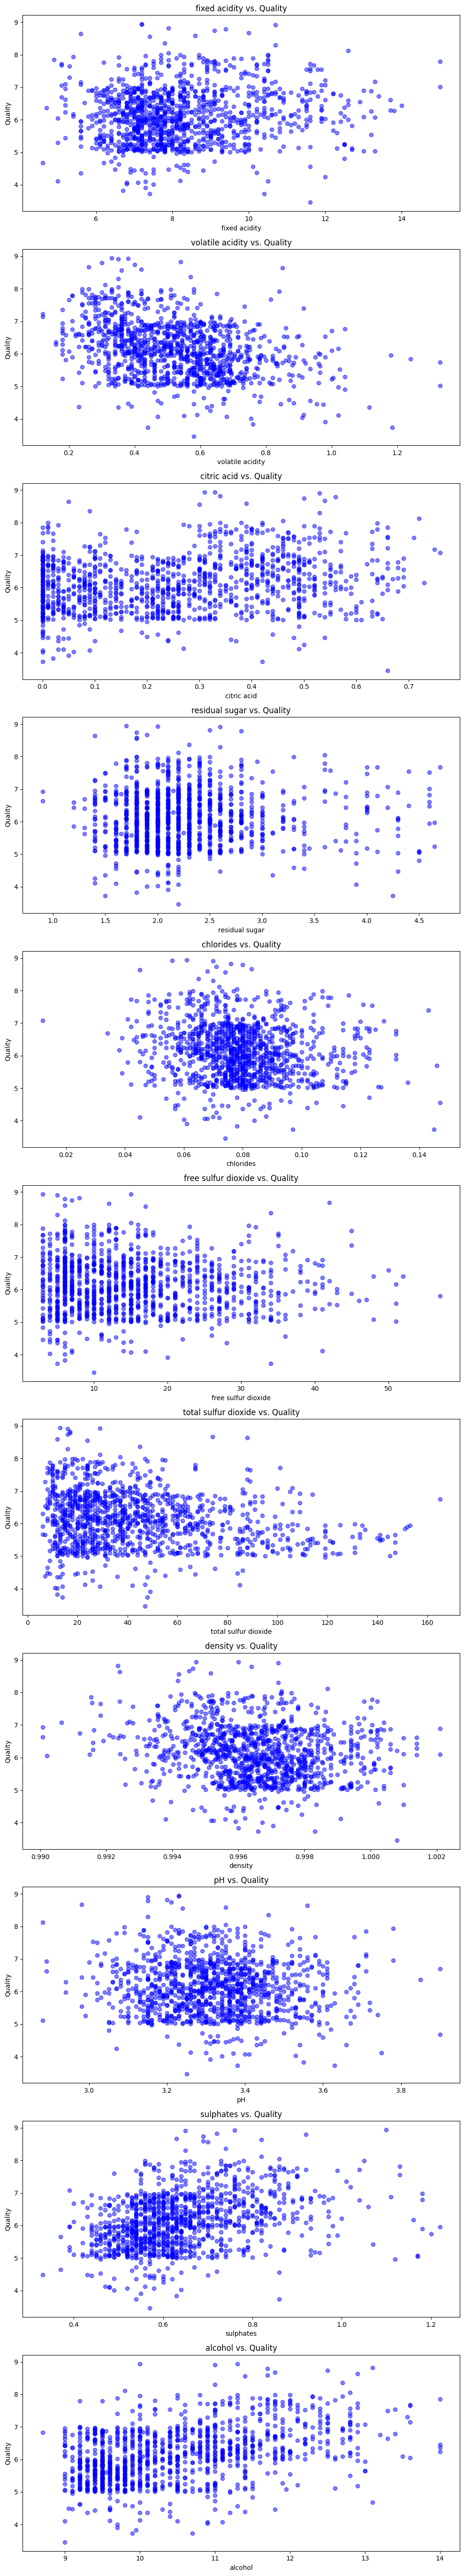

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

min_max_scaler = preprocessing.MinMaxScaler()

# Assuming wineQualDf is already loaded
X = wineQualDf.drop(columns=['quality'])
y = wineQualDf[['quality']]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(Xtrain, ytrain)
yPred = model.predict(Xtest)

# Calculate metrics
mse = mean_squared_error(ytest, yPred)
mae = mean_absolute_error(ytest, yPred)
r2 = r2_score(ytest, yPred)

print(f'mse: {round(mse, 5)}')
print(f'mae: {round(mae, 5)}')
print(f'Rsquared score: {round(r2, 5)}')

# Print the weights (coefficients) for each feature
print("\nWeights (coefficients) for each feature:")
for feature, weight in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {round(weight, 5)}")

# Print the bias (intercept)
print(f"Bias (intercept): {round(model.intercept_[0], 5)}")

# Scatter plots for all features
fig, axes = plt.subplots(len(X.columns), 1, figsize=(10, 5 * len(X.columns)))

for i, feature in enumerate(X.columns):
    axes[i].scatter(wineQualDf[feature], wineQualDf["quality"], alpha=0.5, color='blue',marker='x')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Quality")
    axes[i].set_title(f"{feature} vs. Quality")

plt.tight_layout()
plt.show()


---

<div class="alert alert-success" style="text-align:left;"><h2>Question 2. Prediction Model 2<span style="float:right;">[20 marks]</span></h2></div>

#### Question 2a <span style="color:red">(10 marks)</span>

**TASK**: Build a different machine learning model for the same prediction task.
- Choose a model covered in the lectures or explain your choice of a different method. If you choose a different method, provide at at least two arguments to justify your choice compared to the ones covered in the lectures. 
- Specify which model you selected and why. 
- List the key parameters of your chosen model (Model 2).
- Provide a code implementation for the selected method.

<b>Q2a answer</b>: 

In [14]:
# Your code here


---

### Question 2b <span style="color:red">(10 marks)</span>
**TASK**: Evaluate the performance of your new model and compare it to Prediction Model 1.
- Analyze whether the new model performs better or worse and explain why.
    - Base your evaluation on the same metrics used in Question 1d).
- Include one plot visually comparing the performance of both models.
- Provide a brief textual explanation interpreting the results.

<b>Q2b answer</b>: 

In [ ]:
# Your code here


---

<div class="alert alert-success" style="text-align:left;"><h2>Question 3. Comparison and Improvement<span style="float:right;">[30 marks]</span></h2></div>

#### Question 3a <span style="color:red">(15 marks)</span>
**TASK**: Analyze the impact of removing the least important feature from Prediction Model 1.
- Identify and remove the least important feature. 
- Retrain the Linear Regression model and evaluate its performance. 
- Compare the results before and after feature removal.
- Provide a code implementation and a justification explaining the impact on model performance.


<b>Q3a answer</b>:

In [ ]:
# Your code here


---

#### Question 3b <span style="color:red">(15 marks)</span>
**TASK**: Based on your observations, suggest strategies for improving future models when predicting on new data.
- Discuss potential improvements. 

<b>Hint</b>: based on relevant analysis, feature selection, feature scaling and data processing (e.g. resolve imbalanced samples, errors and outliers, etc.) could all potentially improve the model by reducing training time, fixing overfitting and improving interpretability, etc. 
You can also explore external resources for other potential approaches or techniques.<br>

<b>Note</b>: Coding is optional here, but your answers should be supported by relevant analysis or justifications.

<b>Q3b answer</b>:

In [ ]:
# Add your answer here

---

## Appendix. Coursework Instructions

<b>Coursework Support</b>:
- COMP1008 computing tutorials and exercises on data processing and machine learning models on different example problems
- Example code building and analysing machine learning models in COMP1008 lectures slides on 'Machine learning'
- In the computing sessions, Q&A support for developing .ipynb projects
- In Teams channel 'COMP1008 2024/25 / Questions': support of common questions

<b>Marks</b>: in total 100 marks (count for 25% in COMP1008), awarded on the basis of:
- knowledge and understanding on the theories covered in lectures when answering the questions in the Jupyter Notebook report
- how informative and well presented your code, visualisations and results are (e.g. necessary labels in plots)
- self-learning ability making use of tutorial materials and online resources
- problem solving skills to obtain the answers and results for the specific dataset
- concise report with key details, e.g. parameters, data, etc. for others to repeat your methods and obtain the same results.

For more information of COMP1008 assessment please refer to the coursework issue in Moodle ('Course Content / Assessment').

<b>Format</b>:
- One single .ipynb file named 202425_COMP1008_cw_XXX.ipynb, where XXX is your username (e.g. psxyz)
- The .ipynb file should include your code and answers, using this given .ipynb template (please add cells as needed)
- You could use additional Python libraries as you wish, in addition to the ones demonstrated in the computing sessions
- There are multiple ways using different methods to complete the tasks. These are fine as long as all answers and analysis are supported by the code implemented in Jupyter Notebook, not by using other means (e.g. operations in Excel, or by using other languages, etc.).

<b>Submission</b>: 
- Deadline: <b><font color = "red">24 March, 3pm</font></b>.
- Late submission leads to a 5% deduction of the coursework on each weekday. Work submitted one week late will receive a 0 for the coursework.
- Method: in Moodle submit a single .ipynb file named 202425_COMP1008_cw_XXX.ipynb
- If you can’t submit your coursework on time due to ECs, please contact Student Services and your personal tutor ASAP

<b>Note: Plagiarism vs. Group Discussions</b> 

As you should know, plagiarism is completely unacceptable and will be dealt with according to University's standard policies.<br>
Students are encouraged to have only general discussions on the theory (not the specific questions) when completing the coursework.<br>
It is important that when you actually do your coursework and write the answers, you do it individually.<br>
Do NOT, under any circumstances, share your report, code or figures, etc. with anyone else.